## Yelp Homework
## Due January 11, 2015
## Judy


Read yelp.csv into a DataFrame.

In [2]:
pwd

u'/Users/judyyang/Documents/GA_DS_course/DAT-DC-10/notebooks'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/judyyang/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Bonus: Ignore the yelp.csv file, and construct this DataFrame yourself from yelp.json. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [4]:
yelp = pd.read_table('../data/yelp.csv', sep=',', index_col='user_id')
yelp.describe(include='all')

,business_id,date,review_id,stars,text,type,cool,useful,funny
count,10000,10000,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,4174,1995,10000,NaN,9998,1,NaN,NaN,NaN
top,JokKtdXU7zXHcr20Lrk29A,2011-03-28,eTa5KD-LTgQv6UT1Zmijmw,NaN,Great service,review,NaN,NaN,NaN
freq,37,21,1,NaN,2,10000,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.777500,NaN,NaN,0.876800,1.409300,0.701300
std,NaN,NaN,NaN,1.214636,NaN,NaN,2.067861,2.336647,1.907942
min,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,5.000000,NaN,NaN,1.000000,2.000000,1.000000


In [5]:
# json
'''
import requests
r = requests.get('http://www.omdbapi.com/?t=the shawshank redemption&r=json&type=movie')
r.status_code
r.text
r.json()
'''

"\nimport requests\nr = requests.get('http://www.omdbapi.com/?t=the shawshank redemption&r=json&type=movie')\nr.status_code\nr.text\nr.json()\n"


Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

/Users/judyyang/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


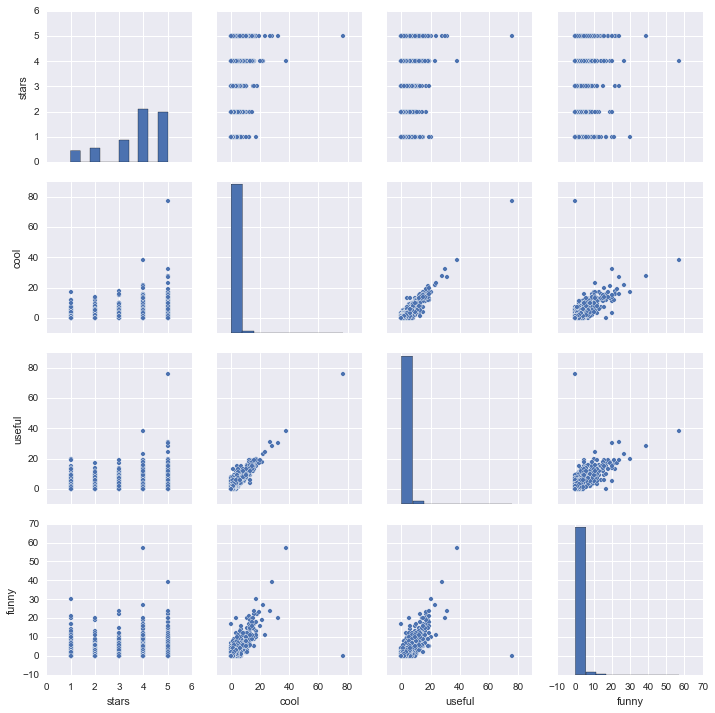

In [6]:
sns.pairplot(yelp[["stars","cool","useful","funny"]])
plt.show()

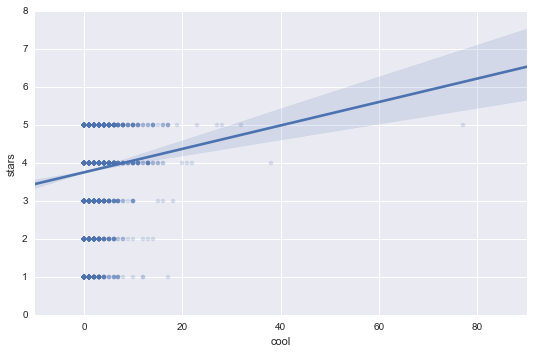

In [7]:
# Seaborn scatter plot with regression line
sns.lmplot(x='cool', y='stars', data=yelp, aspect=1.5, scatter_kws={'alpha':0.2})

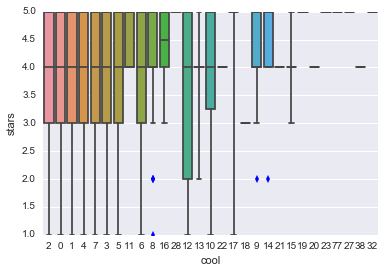

In [8]:
sns.boxplot(x="cool",y="stars",data=yelp)

Define cool/useful/funny as the features, and stars as the response.

In [9]:
feature_cols=['cool', 'useful','funny']
X = yelp[feature_cols]
y = yelp.stars

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [10]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [11]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

In [12]:

# Exercise :  define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
   
    X = yelp[feature_cols]
    y = yelp.stars
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
    

    # instantiate and fit
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # print the coefficients
    true=y_test
    pred=linreg.predict(X_test)
    rmse=np.sqrt(metrics.mean_squared_error(true, pred))
    
    return rmse

In [13]:
print train_test_rmse(['cool', 'useful', 'funny'])

1.17967927404


Try removing some of the features and see if the RMSE improves.

In [14]:
print train_test_rmse(['cool'])
print train_test_rmse(['useful'])
print train_test_rmse(['funny'])

1.20994109294
1.21021630579
1.2087243758


Bonus: Think of some new features you could create from the existing data that might be predictive of the response.


Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

Bonus: Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

Bonus: Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.

Bonus: Figure out how to use linear regression for classification, and compare its classification accuracy with KNN's accuracy.